In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [3]:
Data = np.array(df)
Data = list(Data)
for i in Data:
    i = list(i)
Data

[array([1, 'gasoline', 10, 96, 0.0, 75, 0], dtype=object),
 array([1, 'gasoline', 10, 96, 0.0, 72, 1], dtype=object),
 array([1, 'gasoline', 10, 96, 2.6, 70, 1], dtype=object),
 array([1, 'gasoline', 10, 96, 3.2, 68, 1], dtype=object),
 array([1, 'gasoline', 10, 109, 4.5, 67, 1], dtype=object),
 array([1, 'gasoline', 10, 109, 7.8, 66, 1], dtype=object),
 array([1, 'gasoline', 10, 103, 9.7, 65, 1], dtype=object),
 array([1, 'gasoline', 10, 95, 12.0, 60, 1], dtype=object),
 array([1, 'gasoline', 10, 102, 13.3, 55, 1], dtype=object),
 array([1, 'gasoline', 10, 93, 15.4, 52, 1], dtype=object),
 array([1, 'gasoline', 10, 93, 15.1, 51, 1], dtype=object),
 array([1, 'gasoline', 10, 95, 15.2, 50, 1], dtype=object),
 array([1, 'gasoline', 10, 110, 15.4, 48, 1], dtype=object),
 array([1, 'gasoline', 10, 111, 15.2, 47, 1], dtype=object),
 array([1, 'gasoline', 10, 109, 15.4, 46, 1], dtype=object),
 array([1, 'gasoline', 10, 105, 15.2, 45, 1], dtype=object),
 array([1, 'gasoline', 10, 111, 16.0, 4

In [4]:
def prior_prob(Data):
    tot = len(Data)
    y,n=0.0,0.0
    for i in Data:
        if i[6] == 1:
            y+=1
        else:
            n+=1
    cardinality = []
    for i in df:
        cardinality.append(list(df[i].unique()))
    return y/tot,n/tot,y,n,cardinality

In [5]:
PY,PN,CY,CN,cardinality = prior_prob(Data)
print(f'{PY}  {PN}  {CY}  {CN}')

0.49782135076252726  0.5021786492374728  8683.0  8759.0


In [6]:
#likelihood
def likelihood(Data,PY,PN,CY,CN,cardinality):
    N_table = {}
    Y_table = {}
    for i in range(7):
        likeliy = {}
        likelin = {}
        if len(cardinality[i])<5:
            for j in cardinality[i]:
                n = 0.0
                y = 0.0
                for k in Data:
                    if k[i] == j and k[6] == 0:
                        n+=1
                    elif k[i] == j and k[6] == 1:
                        y+=1
                y/=CY
                n/=CN
                print(f'{j}\t\t -- > \t{y:.4f} \t {n:.4f}')
                likeliy[j] = y if y!=0 else 0.003
                likelin[j] = n if n!=0 else 0.003
            N_table[i] = likelin
            Y_table[i] = likeliy
        else:
            ncol = []
            ycol = []
            for j in Data:
                if j[6] == 0:
                    ncol.append(j[i])
                elif j[6] == 1:
                    ycol.append(j[i])
                
            nmean = np.mean(ncol)
            nvariance = sum([((x - nmean) ** 2) for x in ncol]) / len(ncol)
            nstd = nvariance ** 0.5
            ymean = np.mean(ycol)
            yvariance = sum([((x - ymean) ** 2) for x in ycol]) / len(ycol)
            ystd = yvariance ** 0.5
            likeliy['ystd'] = ystd
            likeliy['ymean'] = ymean
            likelin['nstd'] = nstd
            likelin['nmean'] = nmean
            N_table[i] = likelin
            Y_table[i] = likeliy
            
    return Y_table,N_table
Y_table,N_table = likelihood(Data,PY,PN,CY,CN,cardinality)

gasoline		 -- > 	0.3166 	 0.2718
thinner		 -- > 	0.2865 	 0.3016
kerosene		 -- > 	0.2648 	 0.3232
lpg		 -- > 	0.1321 	 0.1033
0		 -- > 	0.0000 	 1.0000
1		 -- > 	1.0000 	 0.0000


In [7]:
N_table

{0: {'nstd': 1.6694744441663842, 'nmean': 3.580774060965864},
 1: {'gasoline': 0.2718346843246946,
  'thinner': 0.30163260646192486,
  'kerosene': 0.3232104121475054,
  'lpg': 0.1033222970658751},
 2: {'nstd': 43.65199206264775, 'nmean': 135.1227309053545},
 3: {'nstd': 7.589652711876749, 'nmean': 94.72120105034821},
 4: {'nstd': 2.5583416949106654, 'nmean': 3.388937093275488},
 5: {'nstd': 24.105591891941707, 'nmean': 36.70213494691175},
 6: {0: 1.0, 1: 0.003}}

In [8]:
Y_table

{0: {'ystd': 1.81353271734548, 'ymean': 3.2412760566624437},
 1: {'gasoline': 0.3165956466658989,
  'thinner': 0.28653691120580443,
  'kerosene': 0.2647702407002188,
  'lpg': 0.13209720142807785},
 2: {'ystd': 40.054765553203595, 'ymean': 64.56984913048485},
 3: {'ystd': 8.378765913425388, 'ymean': 98.05159507082806},
 4: {'ystd': 3.5194291008408674, 'ymean': 10.593723367499713},
 5: {'ystd': 15.556280888974692, 'ymean': 26.475526891627318},
 6: {0: 0.003, 1: 1.0}}

In [9]:
def Posterior(query,Y_table,N_table):
    y = 1
    n = 1
    for i in range(len(query)-1):
        if len(cardinality[i])<5:
            y*=Y_table[i][query[i]]
            n*=N_table[i][query[i]]
        else:
            nstd = N_table[i]['nstd']
            nmean = N_table[i]['nmean']
            ystd = Y_table[i]['ystd']
            ymean = Y_table[i]['ymean']
            yx = query[i]
            nx = query[i]
            yprob = (1/(ystd*np.sqrt(2*np.pi)))*np.exp((-1*((yx-ymean)**2))/(2*(ystd**2)))
            nprob = (1/(nstd*np.sqrt(2*np.pi)))*np.exp((-1*((nx-nmean)**2))/(2*(nstd**2)))
            y*=yprob
            n*=nprob            
    y*=PY
    n*=PN
    
    
    return y,n

In [10]:
def NB(Data):
    Result = []
    PY,PN,CY,CN,cardinality = prior_prob(Data)
    Y_table,N_table = likelihood(Data,PY,PN,CY,CN,cardinality)
    for query in Data:
        y,n = Posterior(query,Y_table,N_table)
        if y>n:
            Result.append(1)
        else:
            Result.append(0)
    return Result
    
    

In [11]:
X = np.array(df.iloc[:,:])
Y = np.array(df.iloc[:,6])


In [12]:
ypred = NB(X)
ypred

gasoline		 -- > 	0.3166 	 0.2718
thinner		 -- > 	0.2865 	 0.3016
kerosene		 -- > 	0.2648 	 0.3232
lpg		 -- > 	0.1321 	 0.1033
0		 -- > 	0.0000 	 1.0000
1		 -- > 	1.0000 	 0.0000


[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
# request = []
# request.append(input('Enter your Gender(Male/Female) : '))
# request.append(input('Are You Married(Yes/No) : '))
# request.append(int(input('No. of Co-dependants(0/1/2/3) : ')))
# request.append(input('Education(Graduate/Not Graduate) : '))
# request.append(input('Are you Self Employed(Yes/No) : '))
# request.append(input('Applicant Income(Low/Moderate/High) : '))
# request.append(input('Co-Applicant Income(Low/Moderate/High) : '))
# request.append(input('Loan Amount(Low/Moderate/High) : '))
# request.append(input('Loan Amount Term(Short/Moderate/Acceptable/Long) : '))
# request.append(int(input('Credit History(1/0) : ')))
# request.append(input('Property Area(Rural/Urban/Semiurban) : '))

# print(request)
# NB(request)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Accuracy : {accuracy_score(Y,ypred)*100:.2f} %')

Accuracy : 87.17 %


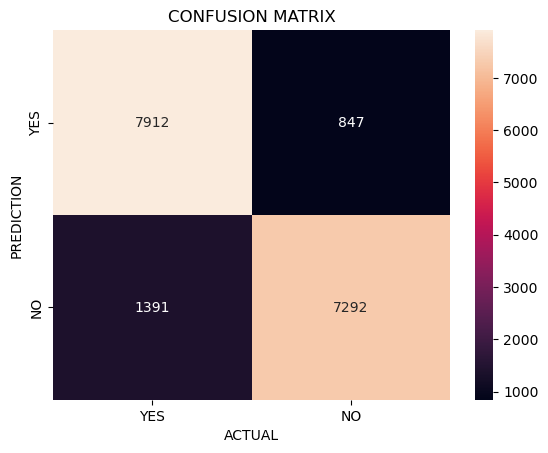

In [15]:
import seaborn as sns

cm=confusion_matrix(Y,ypred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['YES','NO'],yticklabels=['YES','NO'])
plt.ylabel("PREDICTION")
plt.xlabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()